In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional, Union
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from plots import ForexPlotter

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
    ForexPctChange,
    ForexQuickLook,
)

from features import (
    ForexTSIndicators,
    ForexCustomIndicators,
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
    ForexMASignals,
    ForexMACDSignals,
    ForexADXSignals,
    ForexParabolicSARSignals,
    ForexRSISignals,
    ForexStochasticSignals,
    ForexWilliamsRSignals,
    ForexCCISignals,
    ForexATRSignals,
    ForexKeltnerSignals
)

import warnings
warnings.filterwarnings('ignore')


data = ForexDataLoad(file_path = '../data/xauaud.csv').data
ohlcv_data = ForexDataLoad(file_path = '../data/xauaud.csv').data

cleaner = ForexDataClean(data = data, fast_clean = True)
data = cleaner.data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile 

In [2]:
volatility_data = ForexVolatilityIndicators(data = data).generate_all_volatility_indicators(
    bb_period_nbdevup_nbdevdn = [[20, 2, 2], [10, 1, 1]],
    kethlner_ema_atr_multiplier = [[20, 10, 2], [10, 5, 1]],
    atr_periods = [[14, 21, 28], [29, 42, 56]],
    std_periods = [[20, 50, 100], [10, 25, 50]], 
)

VOLATILITY INDICATORS
 Available Fuctions 
1 add_atr 
2 add_bollinger_bands 
3 add_keltner_channels 
4 add_standard_deviation  
5 generate_all_volatility_indicators
[[14, 21, 28], [29, 42, 56]]
{'atr_params': [[14, 21, 28], [29, 42, 56]]}
[10]
{'atr_params': [[14, 21, 28], [29, 42, 56]], 'bb_params': [[20, 2, 2], [10, 1, 1]], 'keltner_params': [[20, 10, 2], [10, 5, 1]]}
[5]
{'atr_params': [[14, 21, 28], [29, 42, 56]], 'bb_params': [[20, 2, 2], [10, 1, 1]], 'keltner_params': [[20, 10, 2], [10, 5, 1]]}
Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   close                           38216 non-null  float64
 1   atr_14                          38202 non-null  float64
 2   atr_14_slope                    38201 non-null  float64
 3   atr_21                        

In [3]:
keltner_signals = ForexKeltnerSignals(
    data = volatility_data[0],
    parameters = volatility_data[1]['keltner_params']
)

KELTNER CHANNELS SIGNAL GENERATION
Available functions: 
1 keltner_price_position_signals 
2 keltner_breakout_signals 
3 keltner_squeeze_signals 
4 keltner_trend_signals 
5 keltner_divergence_signals 
6 generate_all_keltner_signals


In [ ]:
volatility_signals_data = keltner_signals.generate_all_keltner_signals()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 15 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   close                                                                                                38216 non-null  float64
 1   keltner_ema_20_atr_10_2_upper_keltner_ema_20_atr_10_2_lower_position                                 38216 non-null  int64  
 2   keltner_ema_10_atr_5_1_upper_keltner_ema_10_atr_5_1_lower_position                                   38216 non-null  int64  
 3   keltner_ema_20_atr_10_2_upper_keltner_ema_20_atr_10_2_lower_breakout                                 38216 non-null  int64  
 4   keltner_ema_10_atr_5_1_upper_keltner_ema_10_atr_5_1_lower_breakout     

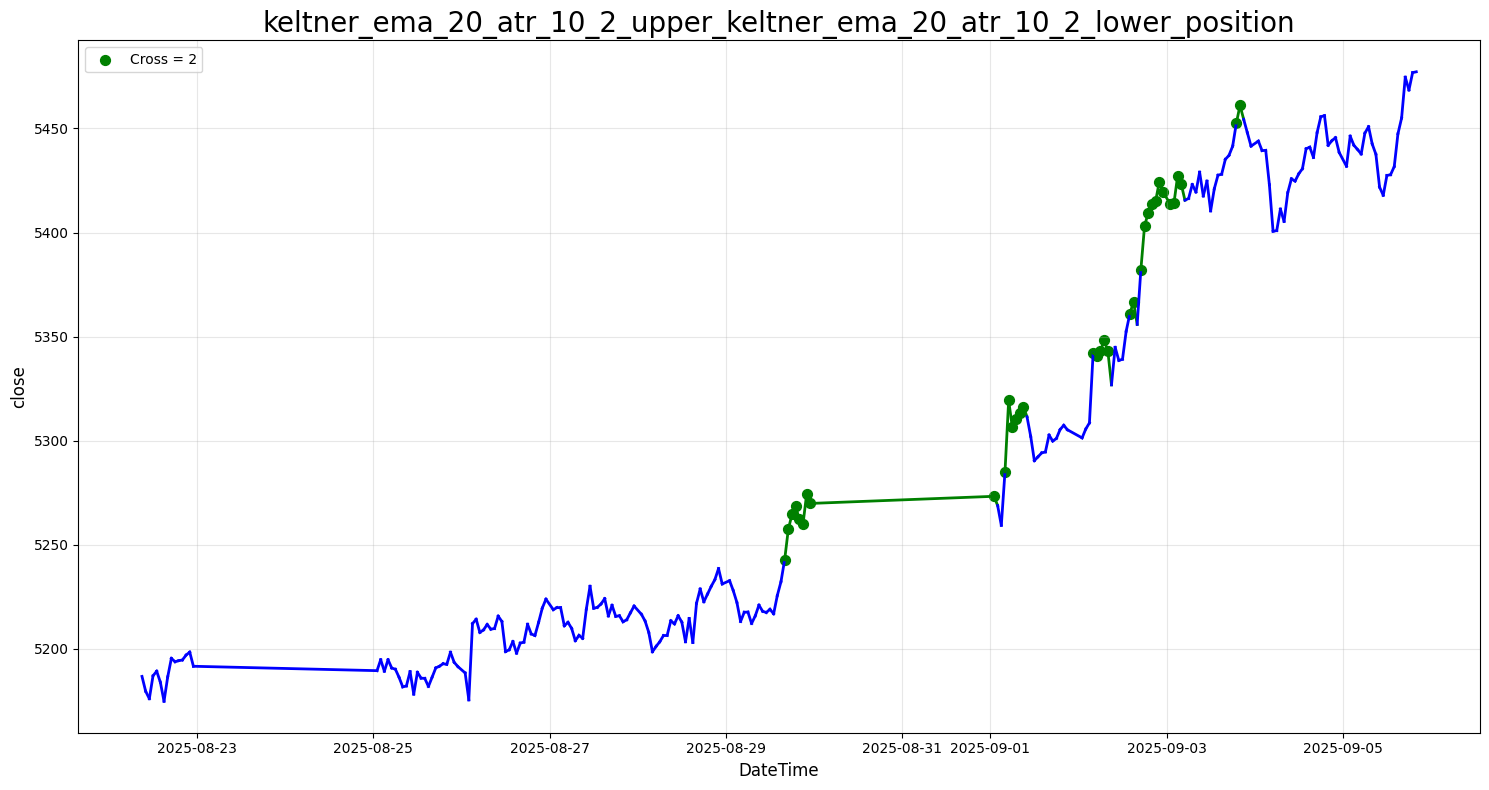

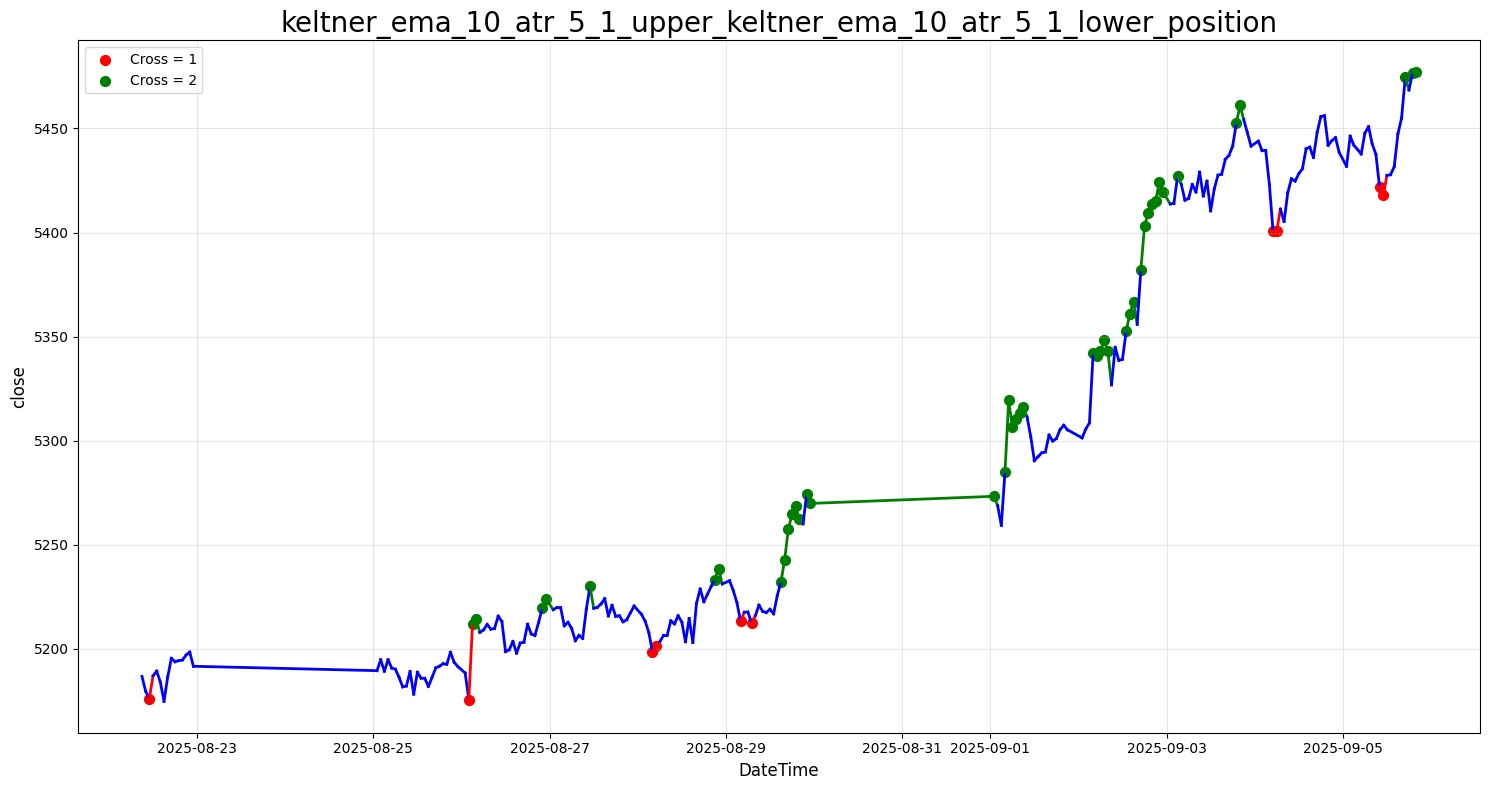

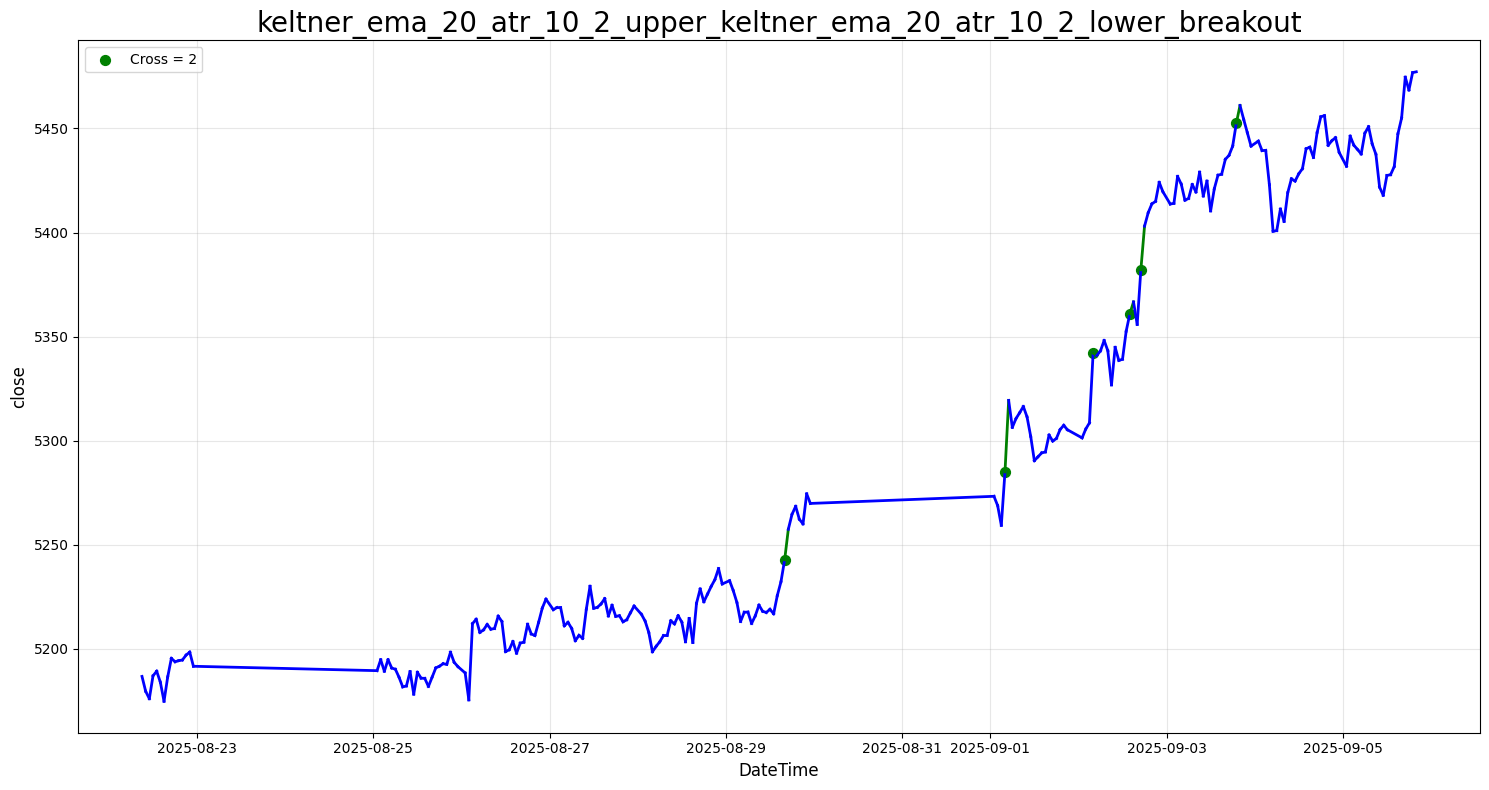

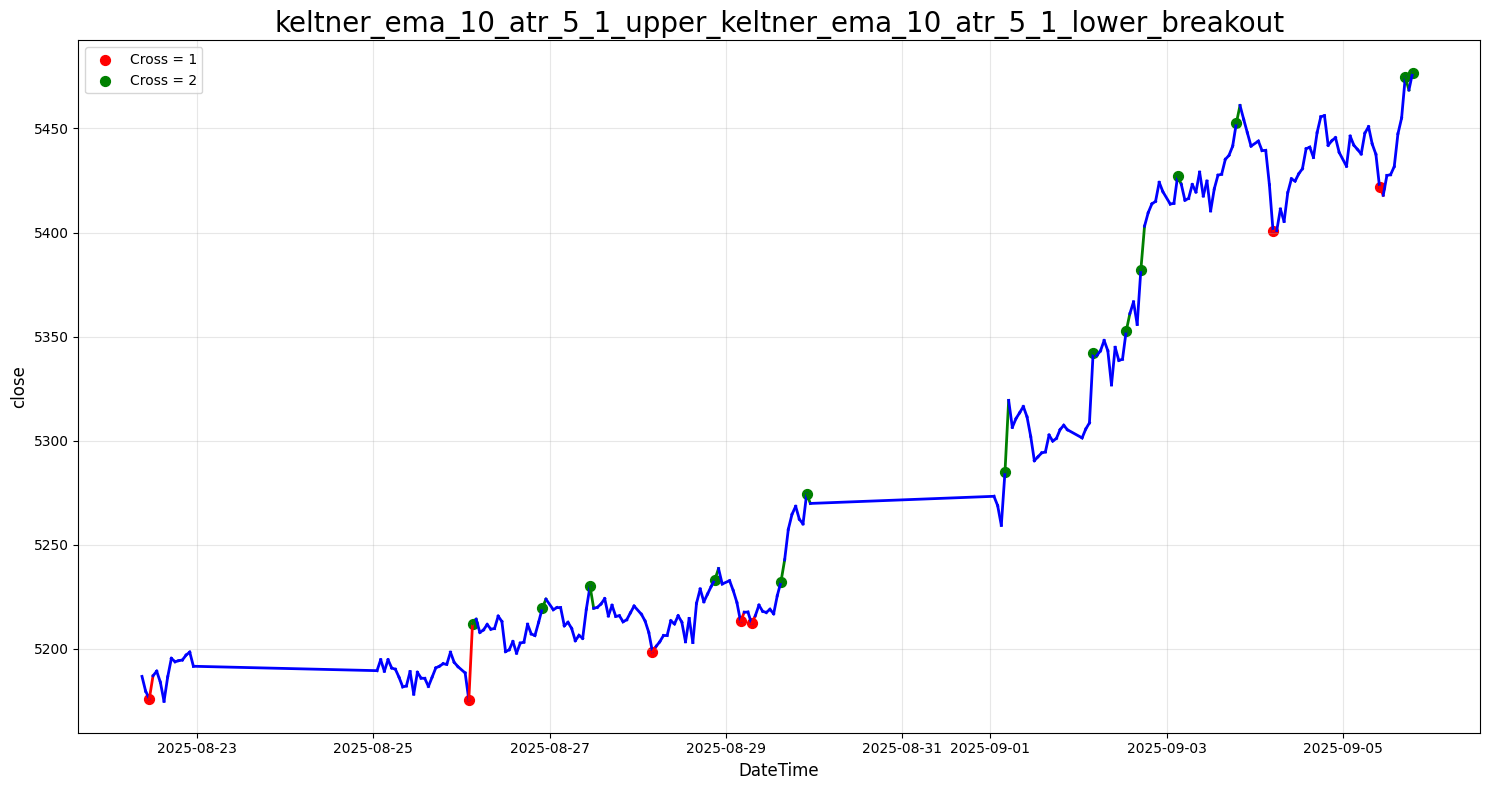

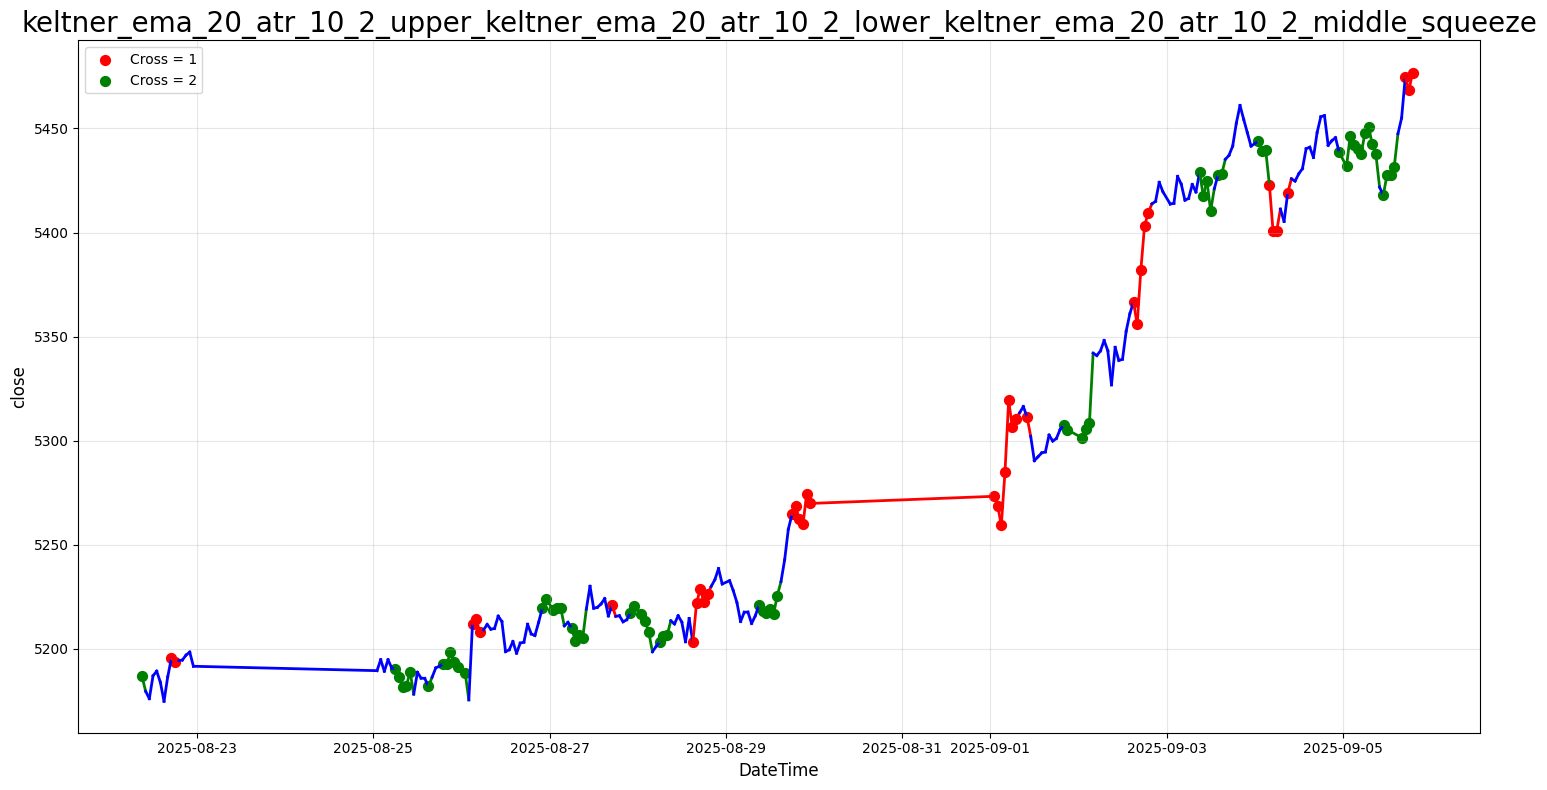

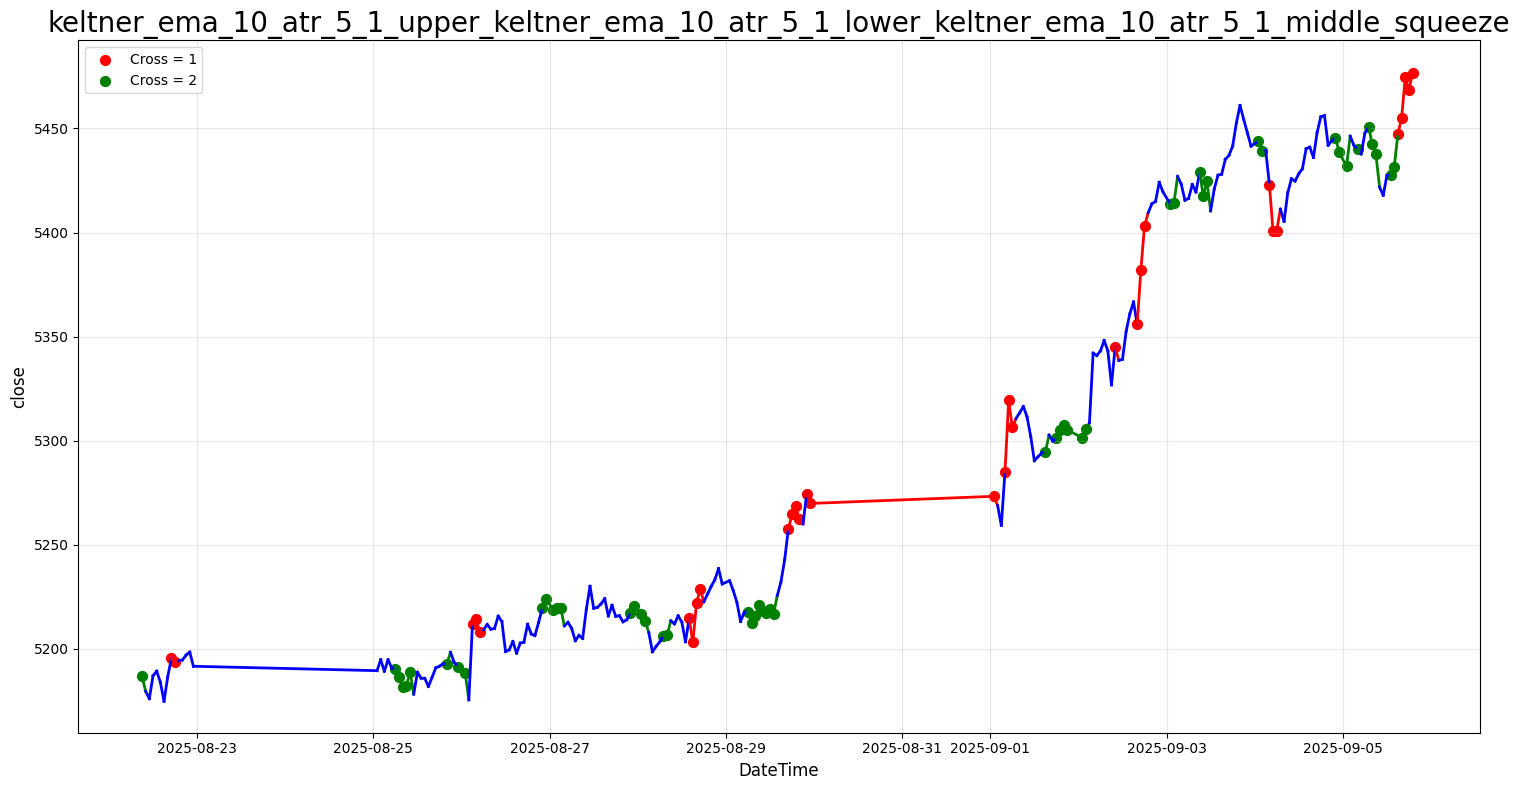

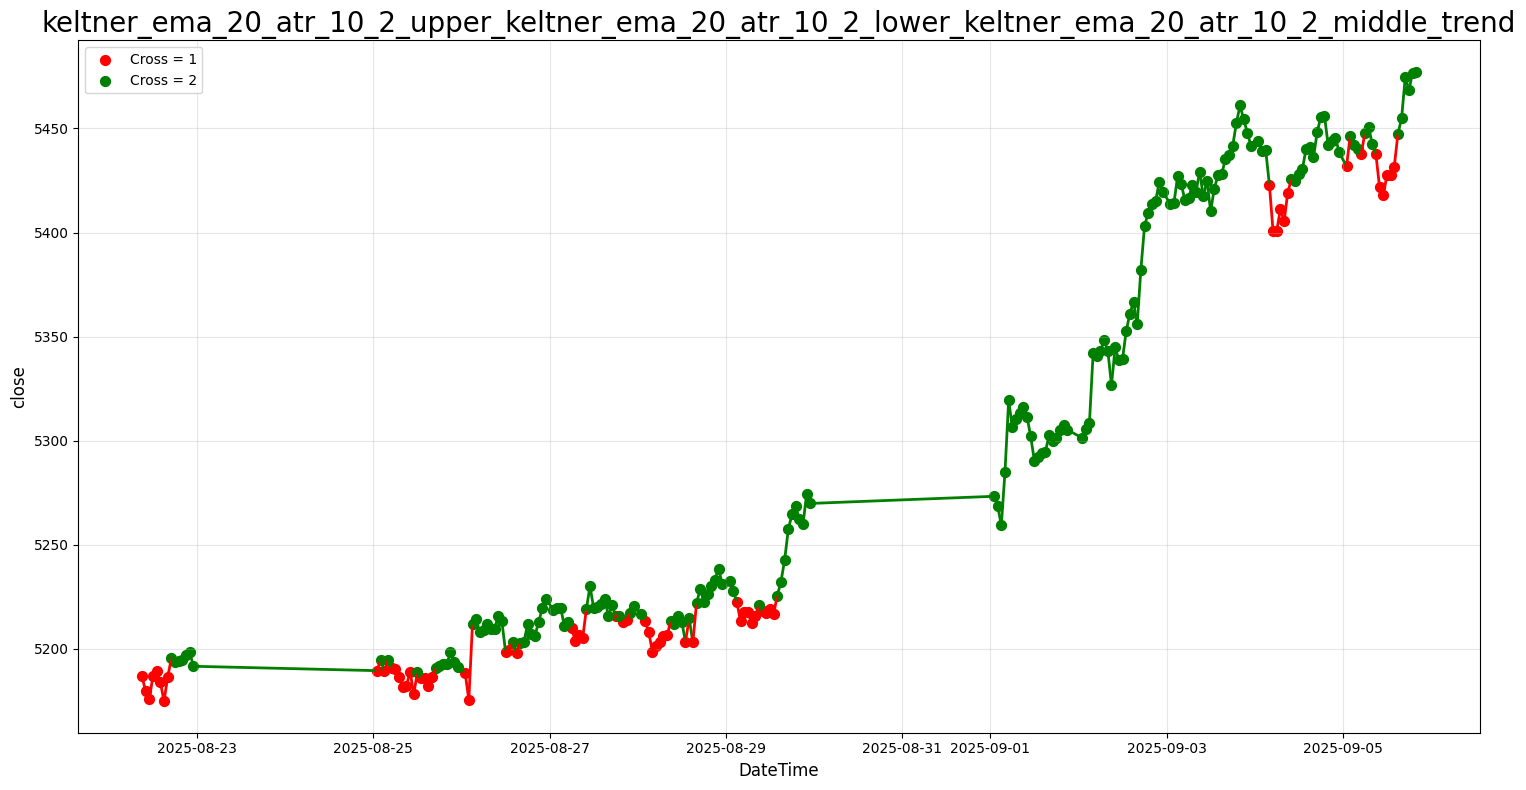

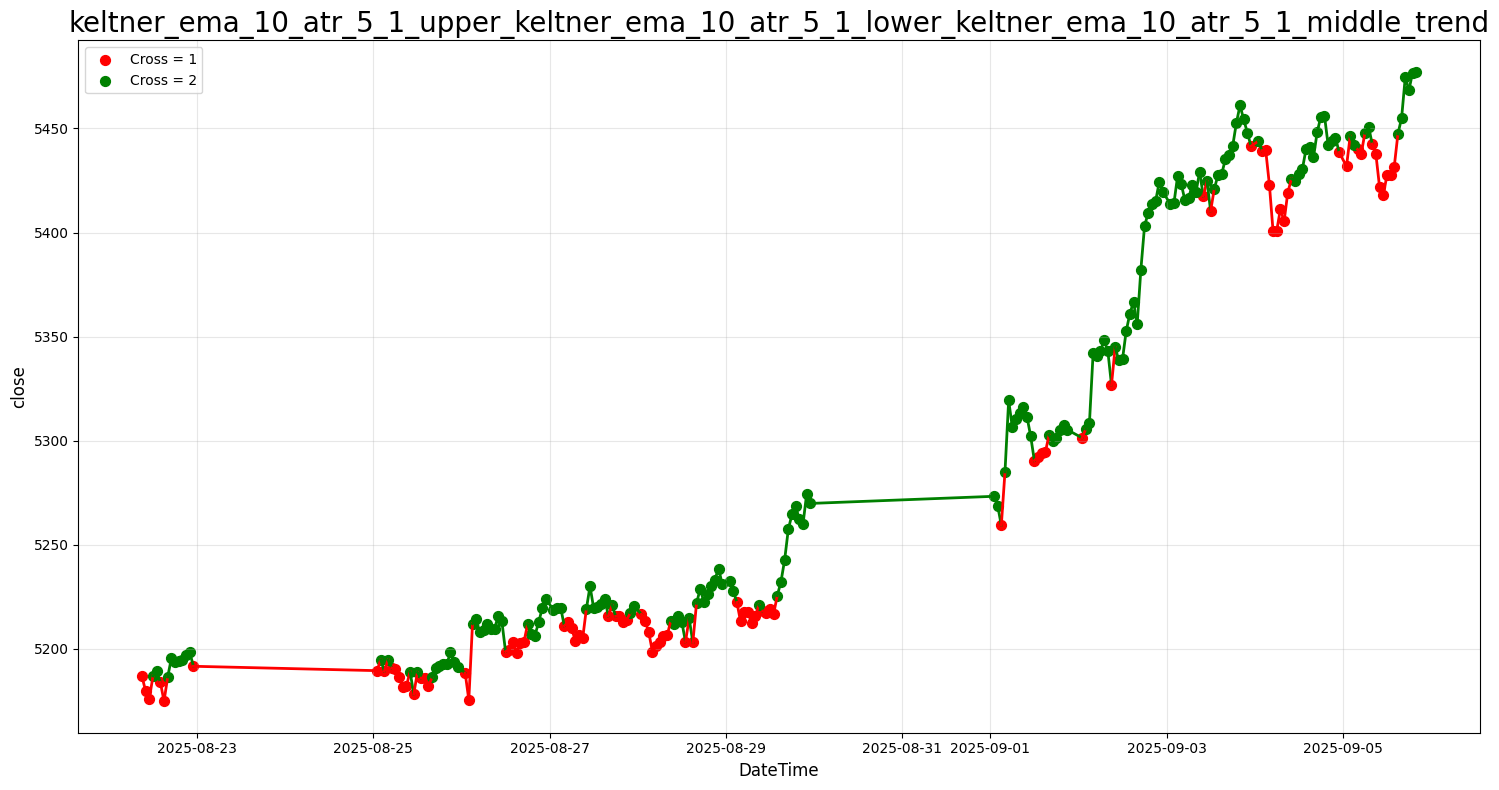

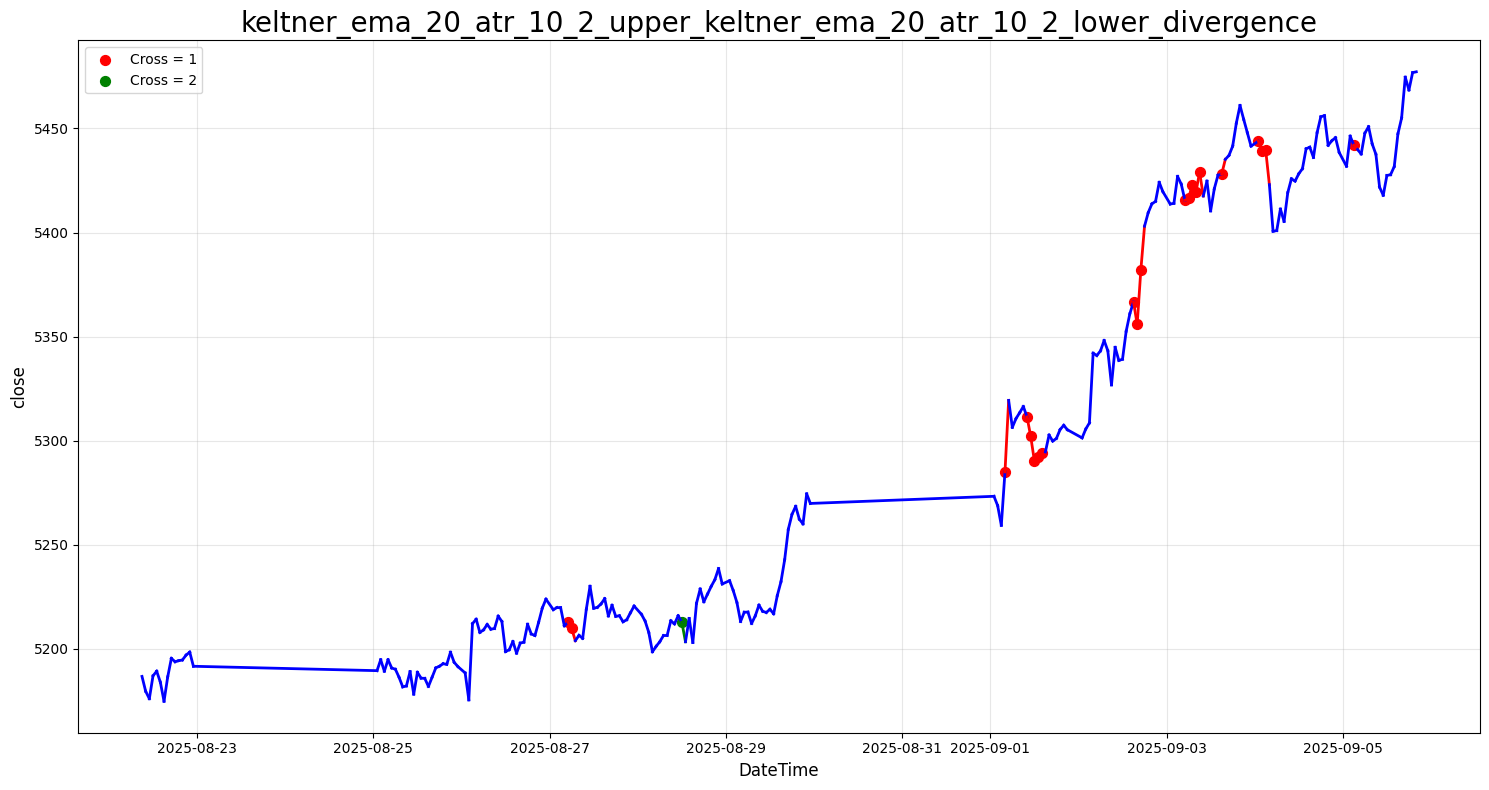

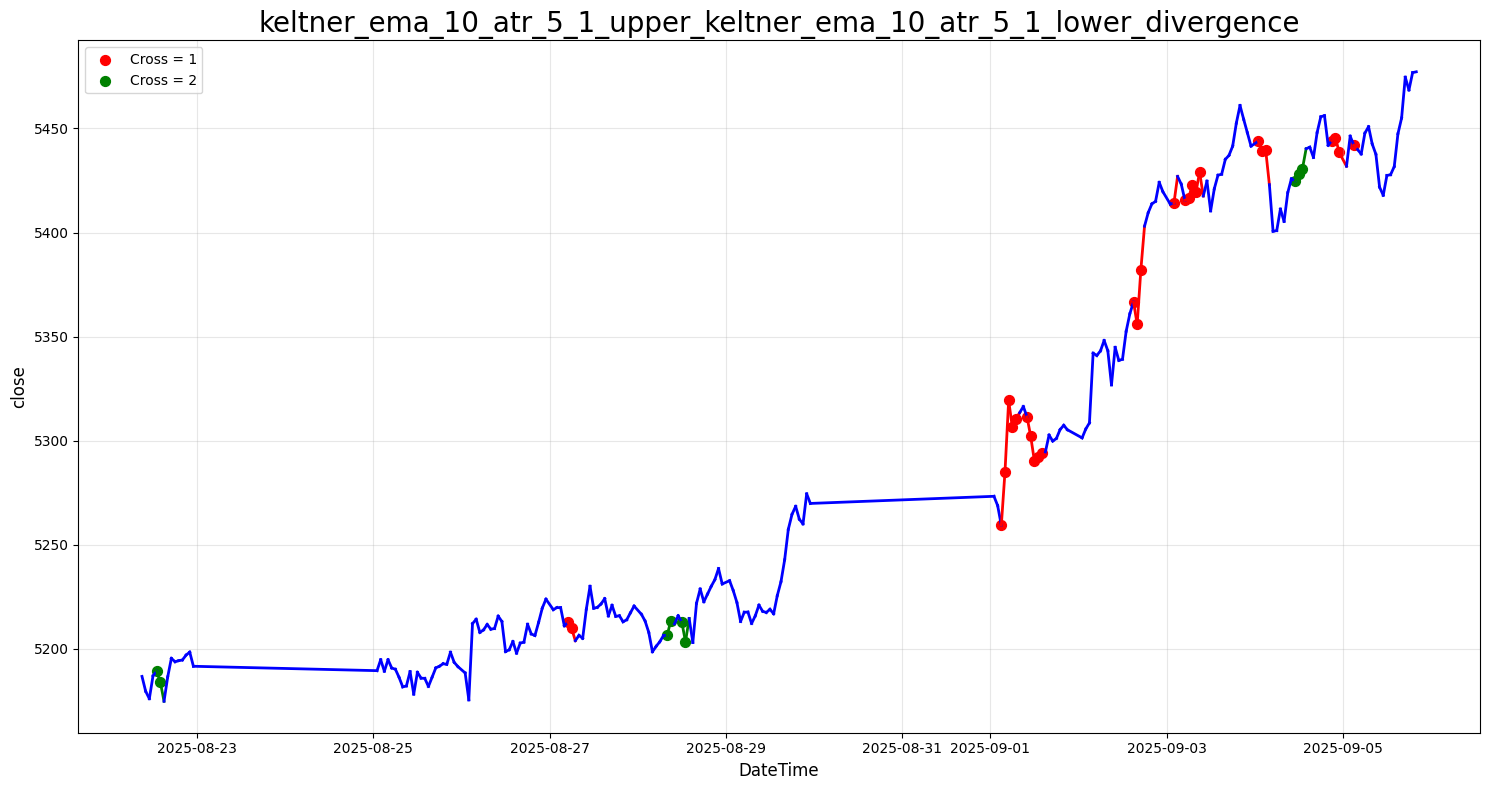

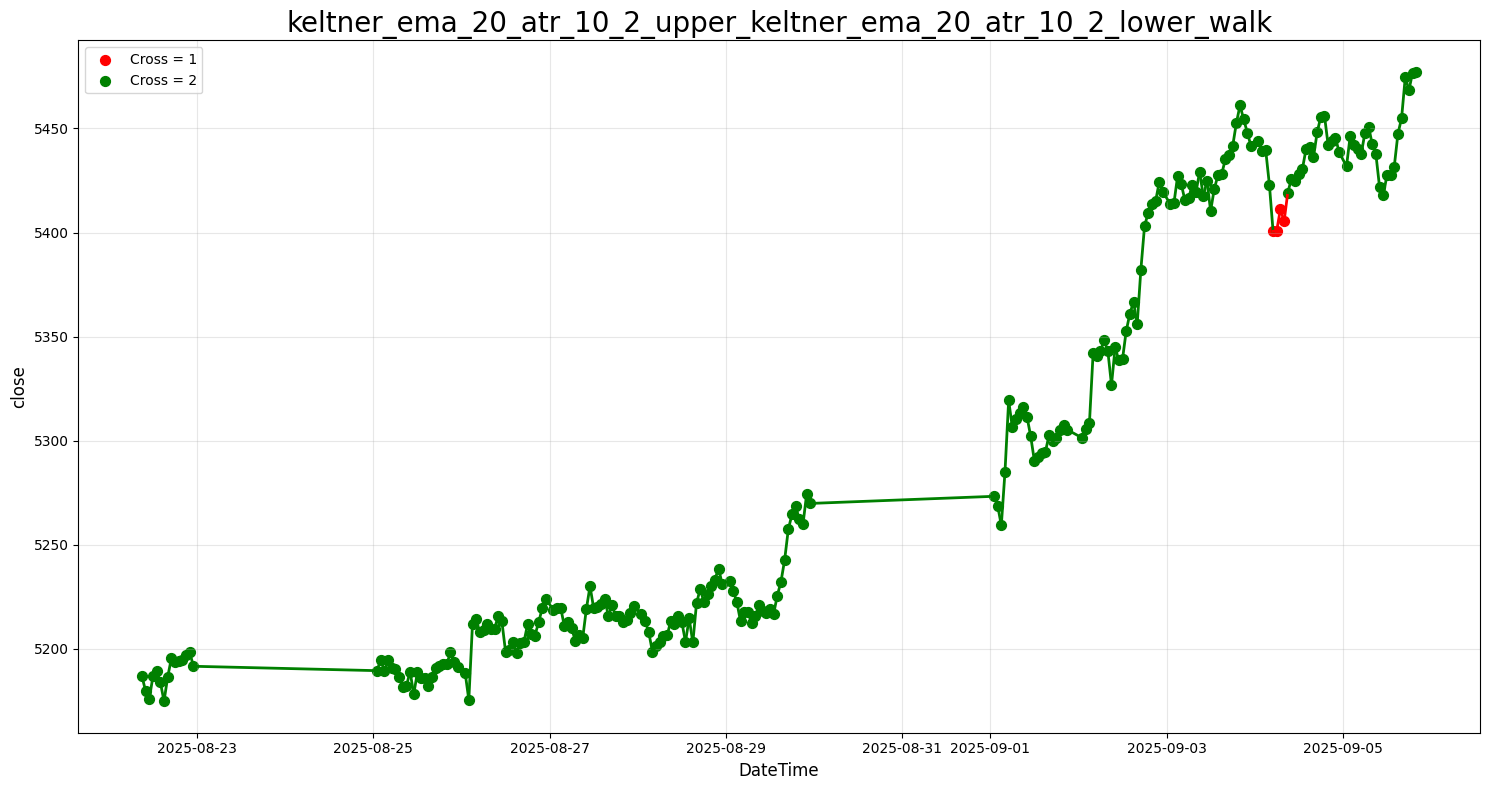

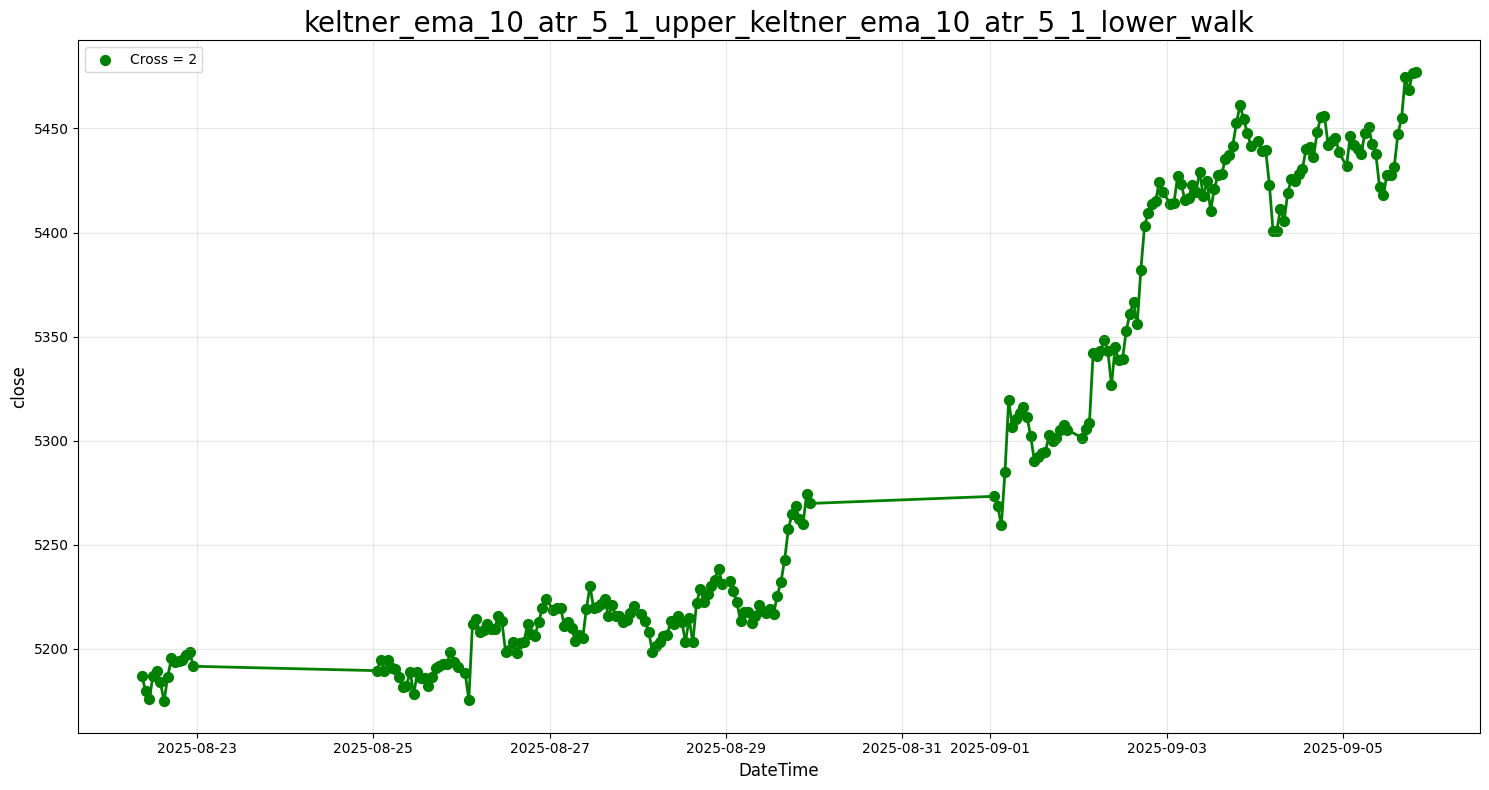

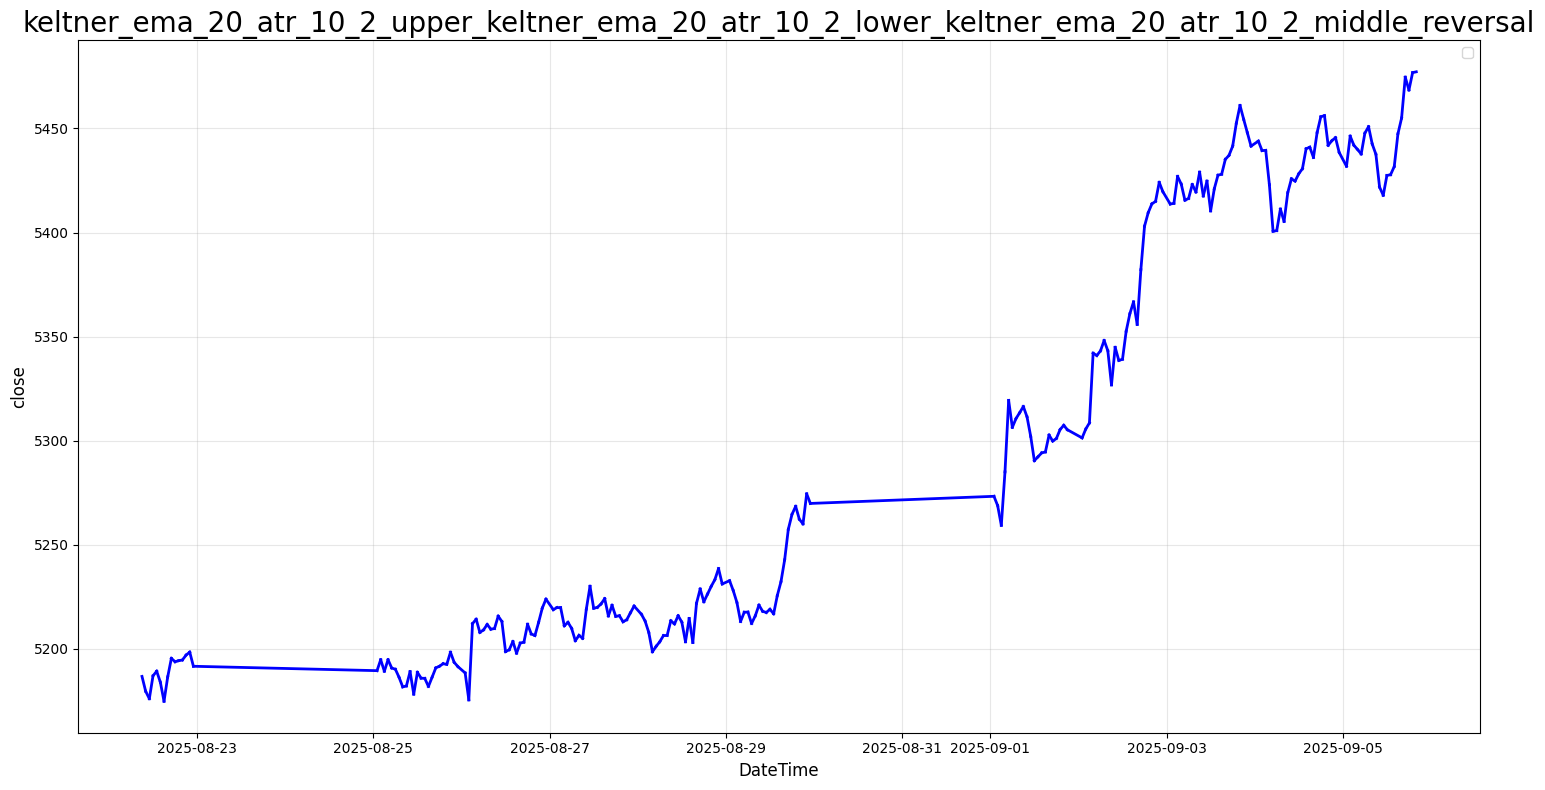

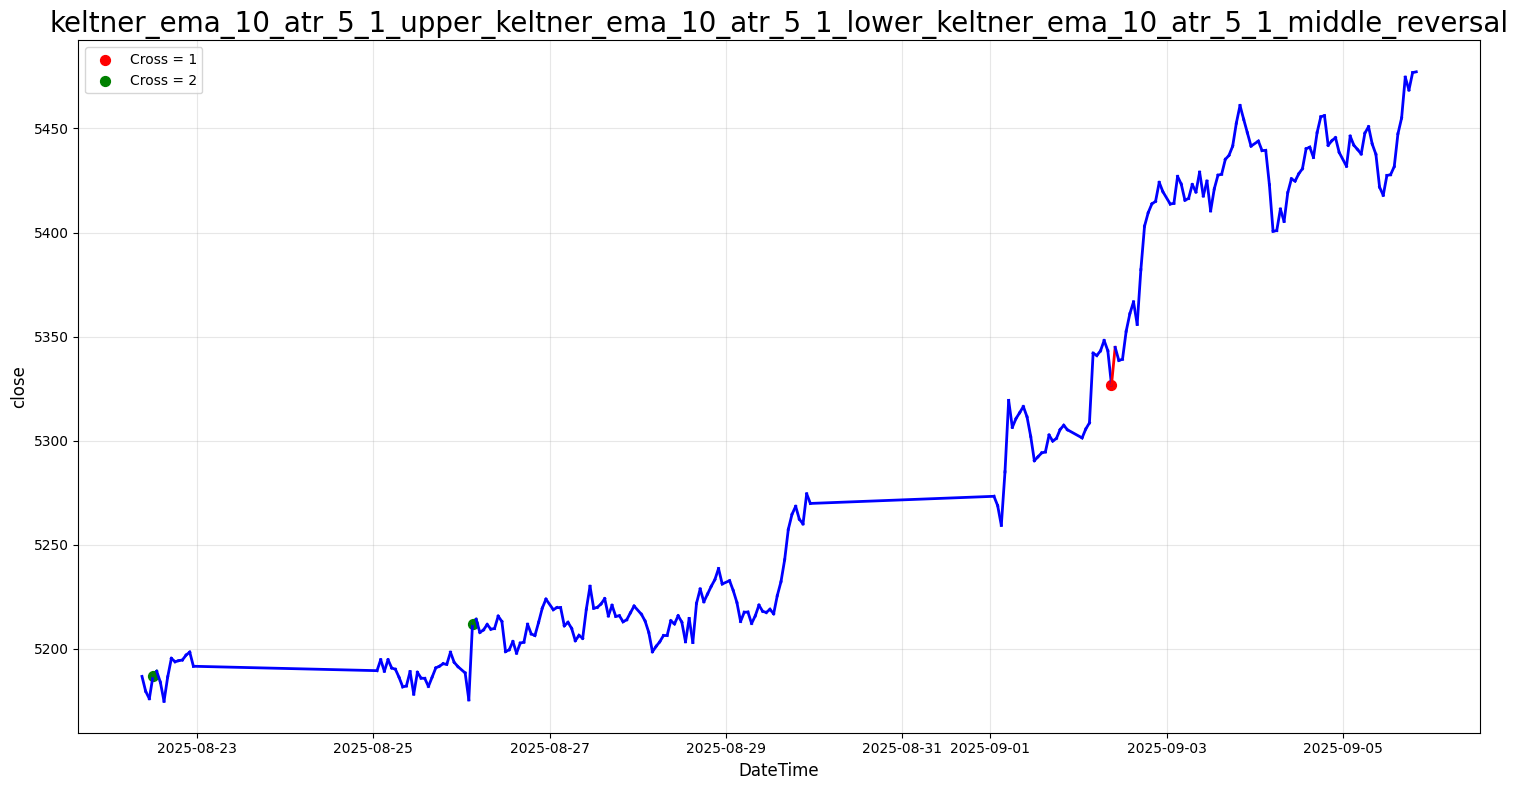

In [5]:
plotter = ForexPlotter(data = volatility_signals_data)
plotter.plot_signals(periods = 240)